# Example of plotting data with geopandas

In [111]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
# source 
# https://github.com/deldersveld/topojson/tree/master/countries/united-states

In [113]:
us_map_gdf = gpd.read_file('../data/us_counties_albers.geojson')

<AxesSubplot:>

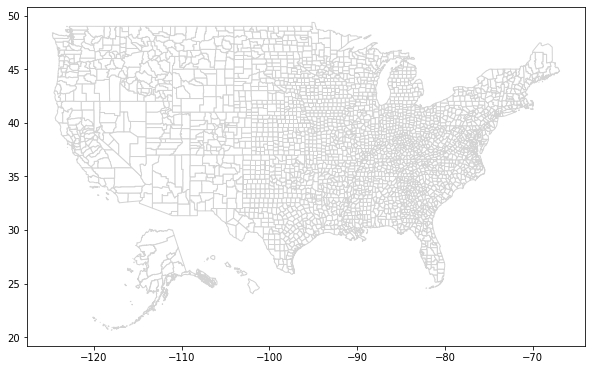

In [114]:
us_map_gdf.plot(color='white',
                edgecolor='lightgray',
                figsize=(10,10)
               )

<AxesSubplot:>

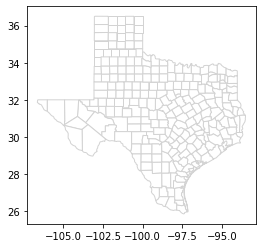

In [115]:
state_filter = us_map_gdf['state']=='Texas'

us_map_gdf[state_filter].plot(color='white',
                edgecolor='lightgray')

### Merging in socioecomonic data

In [116]:
socioeconomic_df = pd.read_csv('../data/socioeconomic_data_clean.csv')

In [117]:
socioeconomic_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,County Name,% Severe Housing Problems,% Uninsured,High school graduation rate,% Unemployed,Income Inequality,Median household income,% Rural,Residential Segregation,Median household income (White),Median household income (Black),Population
0,0,0,0,US,United States,0.179136,0.102234,0.846000,0.038953,4.920018,61937.0,0.192690,46.773464,NaN,NaN,327167434.0
1,1,0,1000,AL,Alabama,0.143407,0.110448,0.893000,0.039336,5.261136,49881.0,0.409632,50.777776,NaN,NaN,4887871.0
2,1,1,1001,AL,Autauga County,0.146635,0.087217,0.900000,0.036291,5.234597,59338.0,0.420022,23.628395,65047.0,27643.0,55601.0
3,1,3,1003,AL,Baldwin County,0.135662,0.113334,0.863616,0.036154,4.417767,57588.0,0.422791,31.825343,59418.0,31112.0,218022.0
4,1,5,1005,AL,Barbour County,0.145833,0.122428,0.814103,0.051714,5.681410,34382.0,0.677896,23.449713,47031.0,23013.0,24881.0


In [118]:
# can use fips code to merge map and data frame

# first align types (make fips in us_map_gdf an int)
us_map_gdf['fips']=us_map_gdf['fips'].astype(int)

In [119]:
socioeconomic_gdf = pd.merge(us_map_gdf,
         socioeconomic_df,
         left_on='fips',
         right_on='5-digit FIPS Code'
        )

In [120]:
socioeconomic_gdf.columns

Index(['id', 'fips', 'state_fips', 'county_fips', 'name', 'lsad',
       'census_area', 'state', 'iso_3166_2', 'geometry', 'State FIPS Code',
       'County FIPS Code', '5-digit FIPS Code', 'State', 'County Name',
       '% Severe Housing Problems', '% Uninsured',
       'High school graduation rate', '% Unemployed', 'Income Inequality',
       'Median household income', '% Rural', 'Residential Segregation',
       'Median household income (White)', 'Median household income (Black)',
       'Population'],
      dtype='object')

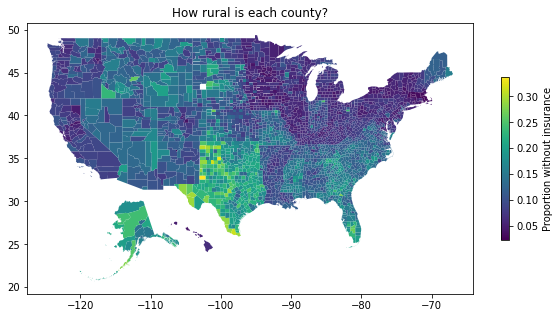

In [121]:
socioeconomic_gdf.plot(column='% Uninsured', 
                       legend=True,
                       figsize=(10,10),
                       legend_kwds={'shrink': 0.3,
                                    'label': 'Proportion without insurance'
                                   }
                      )

plt.title("How rural is each county?")
plt.show()

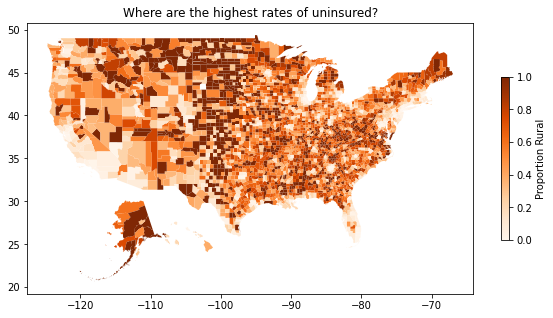

In [122]:
socioeconomic_gdf.plot(column='% Rural', 
                       legend=True,
                       figsize=(10,10),
                       legend_kwds={'shrink': 0.3,
                                    'label': 'Proportion Rural'
                                   },
                       cmap='Oranges'
                      )

plt.title("Where are the highest rates of uninsured?")
plt.show()

In [123]:
# Look within a state

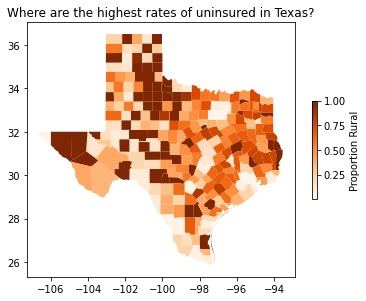

In [124]:
state_filter = socioeconomic_gdf['state']=='Texas'

socioeconomic_gdf[state_filter].plot(column='% Rural', 
                       legend=True,
                       figsize=(6,6),
                       legend_kwds={'shrink': 0.3,
                                    'label': 'Proportion Rural'
                                   },
                       cmap='Oranges'
                      )

plt.title("Where are the highest rates of uninsured in Texas?")
plt.show()

### Voting data

In [125]:
vote_df = pd.read_csv('../data/election_clean.csv')

In [126]:
vote_df.head()

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,dem_majority,state_proportion
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,False,NaN
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,False,NaN
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,False,NaN
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,False,NaN
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,False,NaN


#### merging with us map data

* no fips column so need to use county name and strip string "County" from each and also state name

In [127]:
us_map_gdf['name'].head(), vote_df['county_name'].head()

(0     Autauga
 1      Blount
 2    Chambers
 3     Chilton
 4     Colbert
 Name: name, dtype: object,
 0    Autauga County
 1    Baldwin County
 2    Barbour County
 3       Bibb County
 4     Blount County
 Name: county_name, dtype: object)

In [128]:
vote_df['county_name']=vote_df['county_name'].str.replace(' County','')

In [129]:
# checking number of rows in each of the data frames

In [130]:
socioeconomic_gdf.shape

(3140, 26)

In [131]:
vote_df.shape

(3152, 11)

In [132]:
us_map_gdf.shape

(3143, 10)

In [133]:
us_county_gdf= pd.merge(socioeconomic_gdf,
                        vote_df,
                        left_on=['name', 'state'],
                        right_on=['county_name', 'state_name'])

In [134]:
us_county_gdf['outcome'] = np.where(us_county_gdf['dem_majority'], 
                                    'Dem', 'Rep')

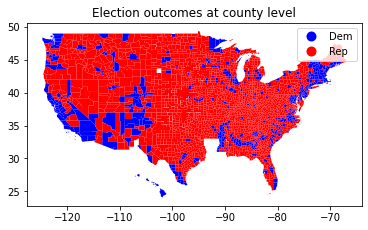

In [135]:
us_county_gdf.plot(column='outcome', 
                   cmap='bwr',
                   legend=True)

plt.title('Election outcomes at county level')
plt.show()

<AxesSubplot:>

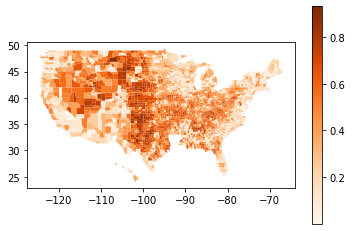

In [136]:
us_county_gdf.plot(column='per_point_diff', 
                   cmap='Oranges',
                   legend=True)

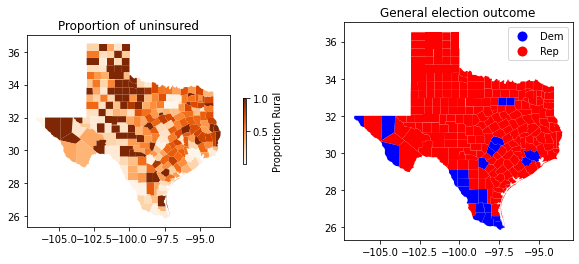

In [149]:

TX_filter = us_county_gdf['state']=='Texas'


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

us_county_gdf[TX_filter].plot(column='% Rural', 
                       legend=True,
                       figsize=(6,6),
                       legend_kwds={'shrink': 0.3,
                                    'label': 'Proportion Rural'
                                   },
                       cmap='Oranges', ax=ax1
                      )

us_county_gdf[TX_filter].plot(column='outcome',
                              cmap='bwr', ax=ax2, legend=True
                             )



ax1.set_title("Proportion of uninsured")
ax2.set_title("General election outcome")
plt.show()